In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-01
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 2000
assets = ['VYM', 'VTI', 'VOO','VGIT']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2018-1-1', end = '2021-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,VYM,VTI,VOO,VGIT
Date,,,,
2018-01-02,75.506050,129.037628,230.026474,58.771889
2018-01-03,75.752098,129.784485,231.394913,58.790318
2018-01-04,76.086044,130.279282,232.409683,58.744274
2018-01-05,76.428780,131.044785,233.899185,58.707420
2018-01-08,76.569374,131.343567,234.383286,58.670578


In [4]:
pf_data.tail() #check companies still open and public at ending date

,VYM,VTI,VOO,VGIT
Date,,,,
2020-12-24,87.738785,190.307816,334.498718,68.192963
2020-12-28,87.962067,191.511917,337.408173,68.222473
2020-12-29,87.826157,190.712448,336.698090,68.222473
2020-12-30,88.088272,191.225677,337.151764,68.242142
2020-12-31,88.835770,192.104095,338.966492,68.271637


<AxesSubplot:xlabel='Date'>

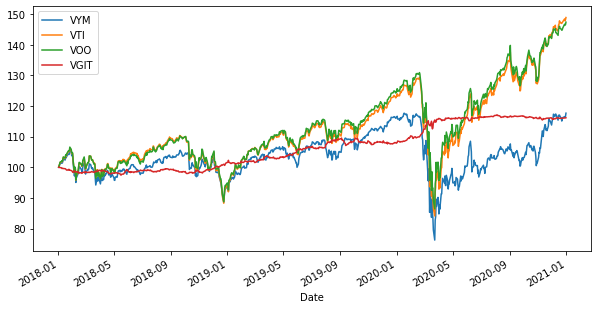

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

VYM     0.053833
VTI     0.131766
VOO     0.128380
VGIT    0.049613
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,VYM,VTI,VOO,VGIT
VYM,0.050683,0.049988,0.050329,-0.003952
VTI,0.049988,0.054165,0.054211,-0.003869
VOO,0.050329,0.054211,0.054593,-0.003977
VGIT,-0.003952,-0.003869,-0.003977,0.001251


In [9]:
log_returns.corr() #get correlation between each pair.

,VYM,VTI,VOO,VGIT
VYM,1.000000,0.954073,0.956795,-0.496363
VTI,0.954073,1.000000,0.996920,-0.470088
VOO,0.956795,0.996920,1.000000,-0.481267
VGIT,-0.496363,-0.470088,-0.481267,1.000000


***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,VYM,VTI,VOO,VGIT
0,0.086002,0.164724,0.300732,0.095237,0.346538,0.257493
1,0.101898,0.166394,0.106247,0.558101,0.076009,0.259642
2,0.083321,0.171771,0.369991,0.100771,0.303020,0.226218
3,0.083226,0.171678,0.377252,0.221842,0.175154,0.225752
4,0.097118,0.159307,0.129664,0.306684,0.276299,0.287353


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,VYM,VTI,VOO,VGIT
1995,0.087977,0.184763,0.380216,0.439232,0.008575,0.171977
1996,0.101674,0.157428,0.054247,0.284292,0.361530,0.299931
1997,0.075905,0.135189,0.307611,0.049451,0.265734,0.377204
1998,0.100866,0.178385,0.156658,0.195779,0.438111,0.209453
1999,0.097878,0.225623,0.405605,0.109371,0.476956,0.008067


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,VYM,VTI,VOO,VGIT
1742,0.052877,0.039215,0.166828,0.028710,0.002559,0.801903
551,0.056224,0.046450,0.164689,0.063148,0.009248,0.762915
207,0.063920,0.052464,0.085722,0.001118,0.175885,0.737275
320,0.061884,0.057786,0.147069,0.100947,0.042622,0.709362
1597,0.067018,0.058910,0.076750,0.040779,0.174328,0.708143
...,...,...,...,...,...,...
110,0.117295,0.229751,0.162286,0.363085,0.471880,0.002750
1296,0.123220,0.229752,0.067169,0.181588,0.741495,0.009747
1727,0.117348,0.230048,0.162130,0.349463,0.486774,0.001632
935,0.128357,0.230603,0.019880,0.612924,0.359374,0.007822


Text(0, 0.5, 'Expected Return')

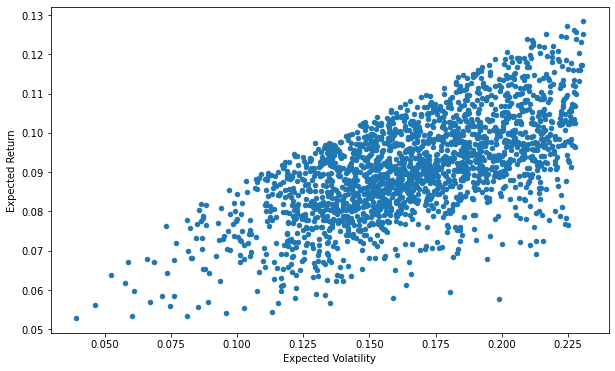

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
# #generate path and name then export
# path = 'results/'
# name = '_'.join(assets) + '.csv'
# path_name = path + name 
# portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [18]:
# calculation
print("money amount calculation for demo use only, please don't simply invest on this results alone.")

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

for i in range(num_assets)):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    print("invest in " + assets[i] + " for ${:.2f}".format(inv) + ".")

print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%")
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%")

money amount calculation for demo use only, please don't simply invest on this results alone.
Intend to invest $25000.00 total.
invest in VYM for $4170.69.
invest in VTI for $717.75.
invest in VOO for $63.99.
invest in VGIT for $20047.58.
Expected annual portfolio return is 5.3%
Expected annual portfolio volatility is 3.9%


# above is the expected return using 3-year data
# below is the actual return using 1 year data.

In [30]:
pf_data_actual = pd.DataFrame()
invested_weights = []

for i in range(num_assets):
    invested_weights.append(sorted_portfolios[assets[i]].iloc[0])
invested_weights = np.array(invested_weights)

for a in assets:
    pf_data_actual[a] = wb.DataReader(a, data_source = 'yahoo', start = '2021-1-1', end = '2022-1-1')['Adj Close'] 

log_returns_actual = np.log(pf_data_actual / pf_data_actual.shift(1))   #compute actual daily log return for all stocks

#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(np.sum(invested_weights * log_returns_actual.mean()) * 250 *100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(np.sqrt(np.dot(invested_weights.T,np.dot(log_returns_actual.cov() * 250, invested_weights)))*100) +"%")


Actual annual portfolio return is 2.7%
Expected annual portfolio volatility is 3.1%
